In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_address = "https://api.covid19api.com/summary"

In [3]:
json_data = requests.get(api_address).json()

In [4]:
df = pd.json_normalize(json_data['Countries'])

In [5]:
df

,ID,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,74a7a460-d6a9-4f28-95bb-332d9f44b75b,Afghanistan,AF,afghanistan,0,155287,0,7212,0,0,2021-10-05T18:30:55.569Z
1,b016627b-1f9e-4e03-a94a-b4499b48b705,Albania,AL,albania,0,171794,0,2713,0,0,2021-10-05T18:30:55.569Z
2,8b89862c-2b05-4ca6-b32f-c95e7de56a45,Algeria,DZ,algeria,0,203915,0,5826,0,0,2021-10-05T18:30:55.569Z
3,d29ed831-fac1-4e16-8c9d-84444e5e9650,Andorra,AD,andorra,0,15267,0,130,0,0,2021-10-05T18:30:55.569Z
4,90640b94-b81a-4c1c-8a07-d8a8eae7a683,Angola,AO,angola,0,58943,0,1577,0,0,2021-10-05T18:30:55.569Z
...,...,...,...,...,...,...,...,...,...,...,...
187,9a5f6805-1bd3-4757-87c7-a3cae3324130,Venezuela (Bolivarian Republic),VE,venezuela,0,373332,0,4510,0,0,2021-10-05T18:30:55.569Z
188,057f1cba-f975-44a3-8205-2f2609878841,Viet Nam,VN,vietnam,0,813961,0,19845,0,0,2021-10-05T18:30:55.569Z
189,6d9788d7-2ce1-4fe8-b339-7376a2cf6c20,Yemen,YE,yemen,0,9214,0,1743,0,0,2021-10-05T18:30:55.569Z
190,3c553d8d-ec4e-4376-86fa-6242db91bbf0,Zambia,ZM,zambia,0,209172,0,3649,0,0,2021-10-05T18:30:55.569Z


In [6]:
df.dtypes

ID                object
Country           object
CountryCode       object
Slug              object
NewConfirmed       int64
TotalConfirmed     int64
NewDeaths          int64
TotalDeaths        int64
NewRecovered       int64
TotalRecovered     int64
Date              object
dtype: object

<AxesSubplot:xlabel='NewDeaths', ylabel='Country'>

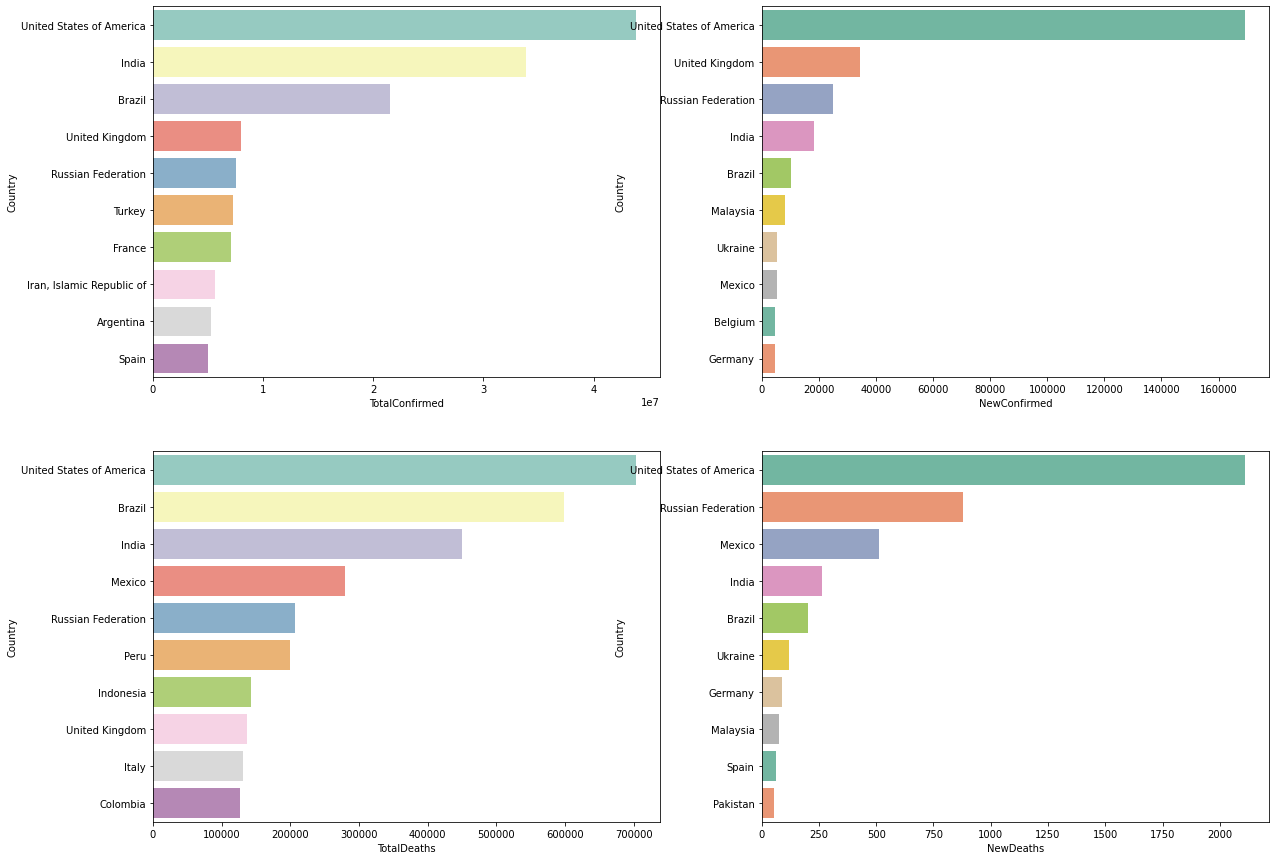

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))

df = df.sort_values(by='TotalConfirmed', ascending = False)
sns.barplot(x='TotalConfirmed', 
            y="Country",palette="Set3",
            data=df.iloc[:10],
            ax=ax[0, 0])


df = df.sort_values(by='NewConfirmed', ascending = False)
sns.barplot(x='NewConfirmed', 
            y="Country",palette="Set2",
            data=df.iloc[:10],
            ax=ax[0, 1])

df = df.sort_values(by='TotalDeaths', ascending = False)
sns.barplot(x='TotalDeaths', 
            y="Country",palette="Set3",
            data=df.iloc[:10],
            ax=ax[1, 0])

df = df.sort_values(by='NewDeaths', ascending = False)
sns.barplot(x='NewDeaths', 
            y="Country",palette="Set2",
            data=df.iloc[:10],
            ax=ax[1, 1])



In [8]:
# df.groupby(['TotalConfirmed','TotalDeaths','TotalDeaths']).sum().plot(kind="bar",Y = "Country",figsize=(20,10), width = 0.7)


In [9]:
all_data = "https://api.covid19api.com/country/south-africa?from=2020-03-01T00:00:00Z&to=2020-04-01T00:00:00Z"

In [10]:
json_alldata = requests.get(all_data).json()

In [11]:
# json_alldata

In [12]:
df1 = pd.json_normalize(json_alldata)

In [13]:
df1.shape

(32, 13)

# Live data updated every 10 mins : Example South Africa

Returns all cases by case type for a country from the first recorded case

In [57]:
Countries = "https://api.covid19api.com/countries"

In [58]:
json_Count_data = requests.get(Countries).json()

In [59]:
df_Countries = pd.json_normalize(json_Count_data)

In [60]:
df_Countries

,Country,Slug,ISO2
0,Australia,australia,AU
1,Guam,guam,GU
2,Rwanda,rwanda,RW
3,Zimbabwe,zimbabwe,ZW
4,Austria,austria,AT
...,...,...,...
243,China,china,CN
244,Libya,libya,LY
245,South Sudan,south-sudan,SS
246,Spain,spain,ES


In [89]:
live = "https://api.covid19api.com/total/dayone/country/south-africa"

In [90]:
json_live_data = requests.get(live).json()

In [91]:
df2 = pd.json_normalize(json_live_data)

In [92]:
df2

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date
0,South Africa,,,,,0,0,1,0,0,1,2020-03-05T00:00:00Z
1,South Africa,,,,,0,0,1,0,0,1,2020-03-06T00:00:00Z
2,South Africa,,,,,0,0,1,0,0,1,2020-03-07T00:00:00Z
3,South Africa,,,,,0,0,3,0,0,3,2020-03-08T00:00:00Z
4,South Africa,,,,,0,0,3,0,0,3,2020-03-09T00:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...
574,South Africa,,,,,0,0,2902672,87626,0,2815046,2021-09-30T00:00:00Z
575,South Africa,,,,,0,0,2904307,87705,0,2816602,2021-10-01T00:00:00Z
576,South Africa,,,,,0,0,2905613,87753,0,2817860,2021-10-02T00:00:00Z
577,South Africa,,,,,0,0,2906422,87780,0,2818642,2021-10-03T00:00:00Z


### Historical data to train the model

In [61]:
main_df = []
for row in range(len(df_Countries)):
    live = "https://api.covid19api.com/total/dayone/country/" + df_Countries.Slug[row]
    json_live_data = requests.get(live).json()
    df_country = pd.json_normalize(json_live_data)
    main_df.append(df_country)

In [62]:
main_df = pd.concat(main_df)

In [135]:
# pd.to_datetime(main_df['Date'], utc=False)
main_df['date_only'] = pd.to_datetime(main_df['Date']).dt.date

In [137]:
main_df.drop(['CityCode', 'CountryCode','Province', 'City', 'Lat', 'Lon', 'Date'], axis=1, inplace=True)

In [305]:
main_df.head()

,Country,Confirmed,Deaths,Recovered,Active,date_only,CurrentCase
0,Australia,4,0,0,4,2020-01-26,4
1,Australia,5,0,0,5,2020-01-27,5
2,Australia,5,0,0,5,2020-01-28,5
3,Australia,6,0,0,6,2020-01-29,6
4,Australia,9,0,2,7,2020-01-30,7


In [306]:
main_df.shape

(108974, 7)

In [173]:
df_austria = main_df[main_df.Country == 'Australia'].reset_index()

In [307]:
df_austria.shape

(618, 7)

In [174]:
df_austria = df_austria.sort_values(by='date_only')

In [175]:
assert (pd.date_range(start=df_austria.date_only.iloc[0], 
                      end=df_austria.date_only.iloc[-1], freq='D') == df_austria.date_only).all()

In [176]:
df_austria.index = pd.date_range(start=df_austria.date_only.iloc[0], 
                                 end=df_austria.date_only.iloc[-1], freq='D')

TRY adding for top 10 in dynamic window

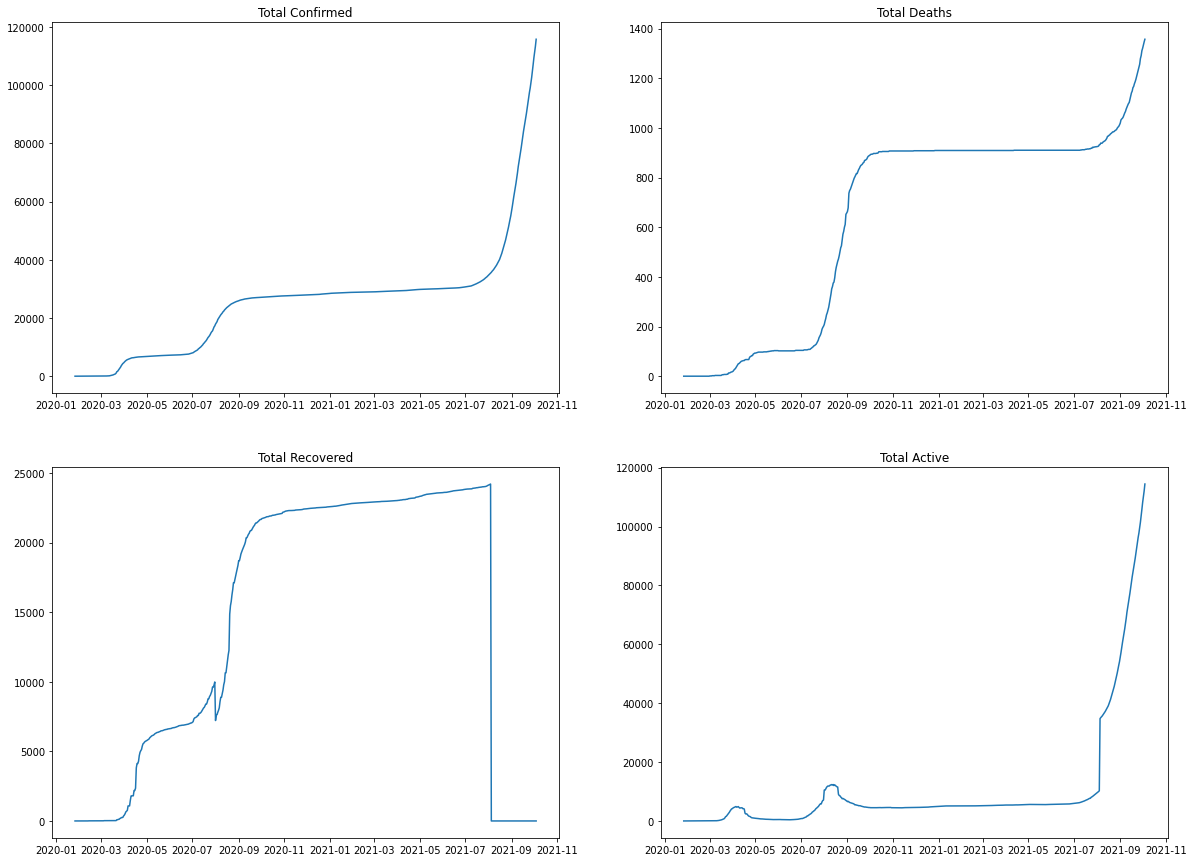

In [177]:
fig = plt.figure(figsize=(20,15))

plot= ['Confirmed','Deaths','Recovered','Active']

for idx, val in enumerate(plot):
    ax1 = plt.subplot(2, 2, idx+1)
    plt.plot(df_austria.index, df_austria[val].values)
    plt.title("Total " + val )
    
    
# plt.show()

In [182]:
main_df.describe()

,Confirmed,Deaths,Recovered,Active
count,1.089740e+05,108974.000000,1.089740e+05,1.089740e+05
mean,4.764318e+05,10911.859508,2.155662e+05,2.502346e+05
std,2.369677e+06,46204.921343,1.180595e+06,1.966754e+06
min,1.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1.888250e+03,29.000000,8.400000e+01,2.270000e+02
50%,1.809100e+04,320.000000,4.983000e+03,2.938000e+03
75%,1.763458e+05,3314.750000,7.064650e+04,2.656300e+04
max,4.385226e+07,703278.000000,3.097475e+07,4.314898e+07


In [183]:
main_df.corr()

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.929936,0.533393,0.861790
Deaths,0.929936,1.000000,0.510336,0.789982
Recovered,0.533393,0.510336,1.000000,0.030657
Active,0.861790,0.789982,0.030657,1.000000


In [184]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108974 entries, 0 to 561
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Country    108974 non-null  object
 1   Confirmed  108974 non-null  int64 
 2   Deaths     108974 non-null  int64 
 3   Recovered  108974 non-null  int64 
 4   Active     108974 non-null  int64 
 5   date_only  108974 non-null  object
dtypes: int64(4), object(2)
memory usage: 5.8+ MB


In [185]:
# Feature Engineering
main_df['CurrentCase'] = main_df['Confirmed'] - main_df['Recovered'] - main_df['Deaths']

In [236]:
date_df = main_df.groupby('date_only')[['Confirmed' ,'Recovered', 'Deaths', 'CurrentCase']].sum().reset_index()

In [237]:
date_df.head(10)

,date_only,Confirmed,Recovered,Deaths,CurrentCase
0,2020-01-22,557,30,17,510
1,2020-01-23,655,32,18,605
2,2020-01-24,941,39,26,876
3,2020-01-25,1434,42,42,1350
4,2020-01-26,2118,56,56,2006
5,2020-01-27,2927,65,82,2780
6,2020-01-28,5578,108,131,5339
7,2020-01-29,6167,127,133,5907
8,2020-01-30,8235,145,171,7919
9,2020-01-31,9927,225,213,9489


<AxesSubplot:xlabel='date_only'>

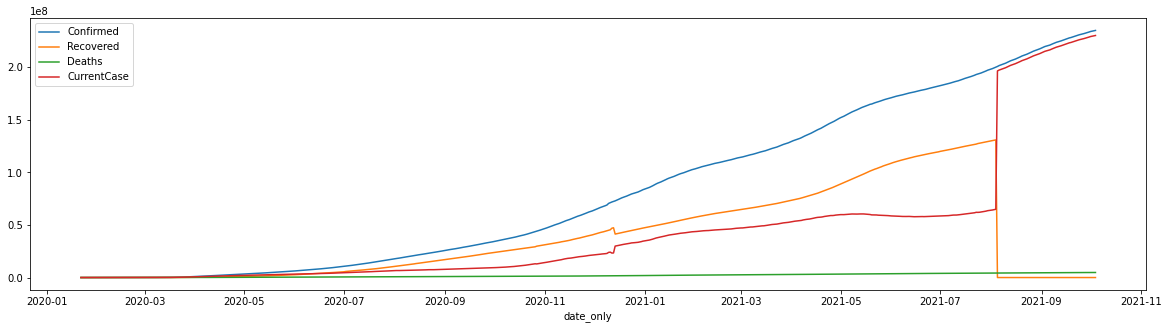

In [192]:
date_df.plot(kind='line', figsize=(20,5))

In [232]:
dfCountry = main_df.groupby(["Country"])[['Confirmed', 'Deaths', 'Recovered', 'CurrentCase']].sum().reset_index()

In [234]:
dfCountry.head() # This information we are getting from API "https://api.covid19api.com/summary"
# US, UK ,India , SF, 
# 5 North , 5 South

,Country,Confirmed,Deaths,Recovered,CurrentCase
0,Afghanistan,34223365,1433635,18289880,14499850
1,Albania,37855295,695225,22652652,14507418
2,Algeria,49327242,1411939,25670233,22245070
3,Andorra,4241266,48522,3085649,1107095
4,Angola,10387064,254794,5895800,4236470


In [238]:
recovered = date_df[['date_only', 'Recovered']]
for index, row in recovered.iterrows():
    if row['Recovered'] is None:
        row['Recovered'] = 0.0
        
death = date_df[['date_only', 'Deaths']]
for index, row in death.iterrows():
    if row['Deaths'] is None:
        row['Deaths'] = 0.0
        
confirmed = date_df[['date_only', 'Confirmed']]
for index, row in confirmed.iterrows():
    if row['Confirmed'] is None:
        row['Confirmed'] = 0.0

# SARIMA Model

In [258]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import numpy as np
import sys
import itertools

In [256]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [214]:
def adfuller_test(dataframe, feature):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(dataframe[feature], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

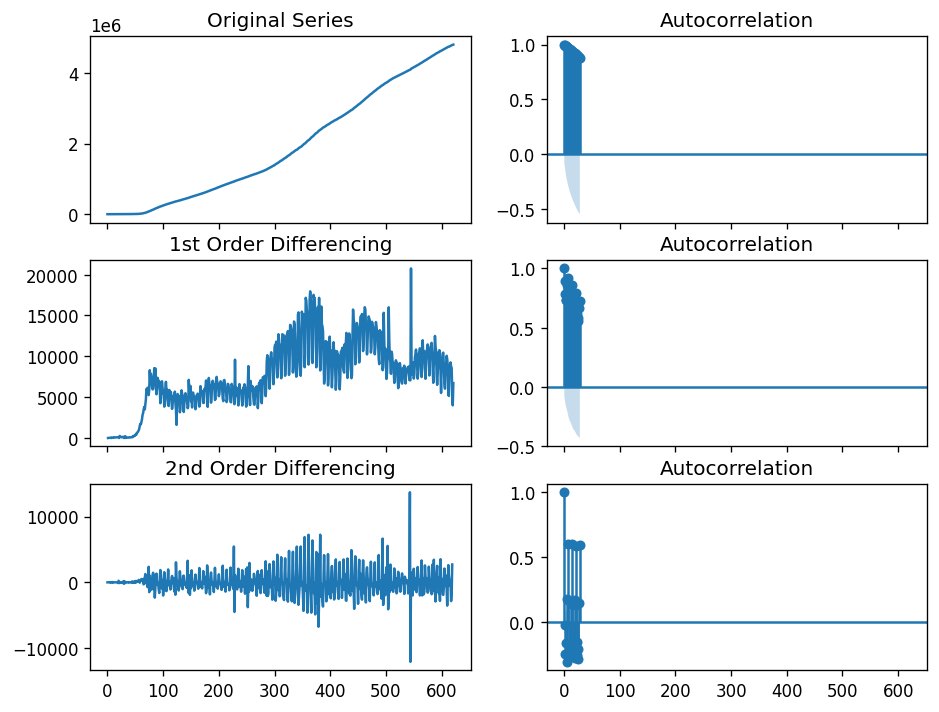

In [254]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(death['Deaths']); axes[0, 0].set_title('Original Series')
plot_acf(death['Deaths'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(death['Deaths'].diff().dropna()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(death['Deaths'].diff().dropna(), ax=axes[1, 1])
diffval = death['Deaths'].diff().dropna()

# 2nd Differencing
axes[2, 0].plot(np.diff(diffval)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(diffval), ax=axes[2, 1])
plt.show()

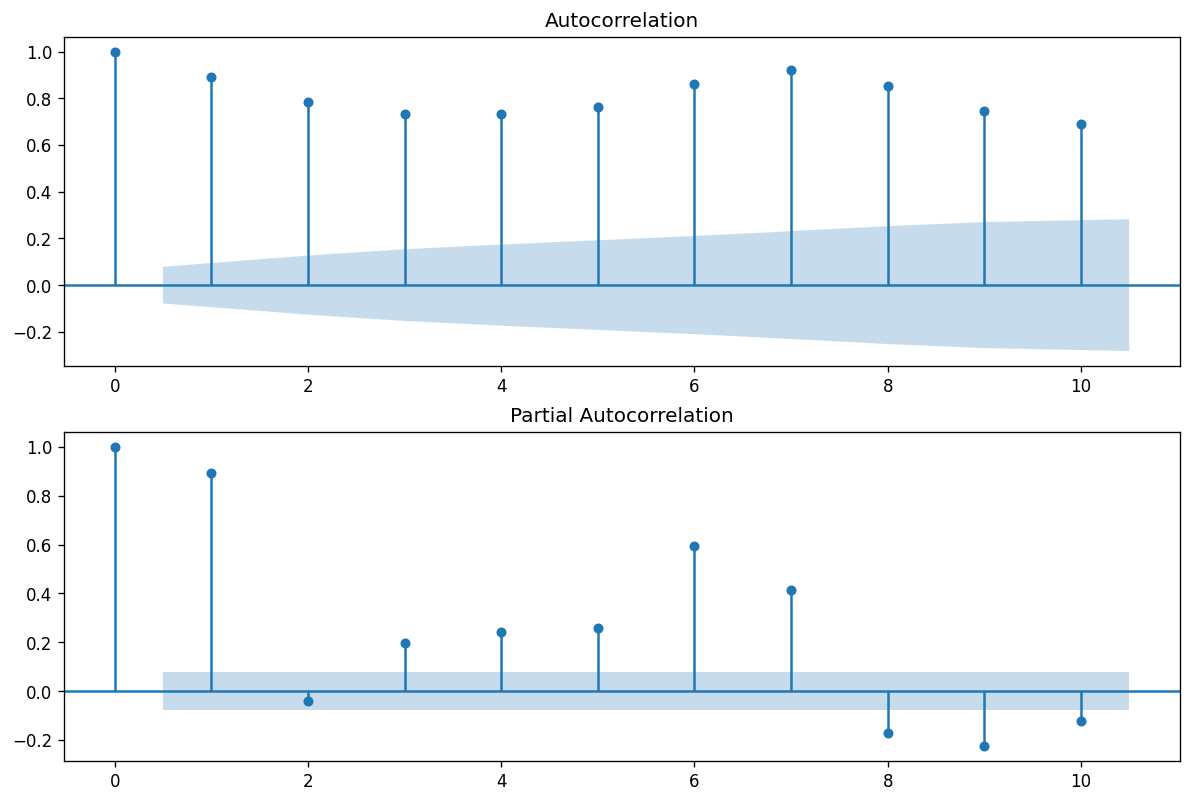

In [242]:
#Autocorrelation Graphs
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(death['Deaths'].diff().dropna(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(death['Deaths'].diff().dropna(), lags=10, ax=ax2)
plt.show()

In [257]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [259]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(np.asanyarray(death['Deaths']),
                                                   order = param,
                                                   seasonal_order = param_seasonal,
                                                   enforce_stationarity=True,
                                                   enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            continue

C:\Users\shrad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\shrad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\shrad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\shrad\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\shrad\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.

In [260]:
print("Best SARIMAX{}x{} model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 1, 1, 12) model - AIC:10899.697827394604


In [261]:
mod = sm.tsa.statespace.SARIMAX(np.asanyarray(death['Deaths']),
                                order=(1, 1, 0),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8710      0.022     39.256      0.000       0.828       0.914
ma.S.L12      -1.0635      0.025    -43.256      0.000      -1.112      -1.015
sigma2      3.141e+06   1.83e+05     17.191      0.000    2.78e+06     3.5e+06


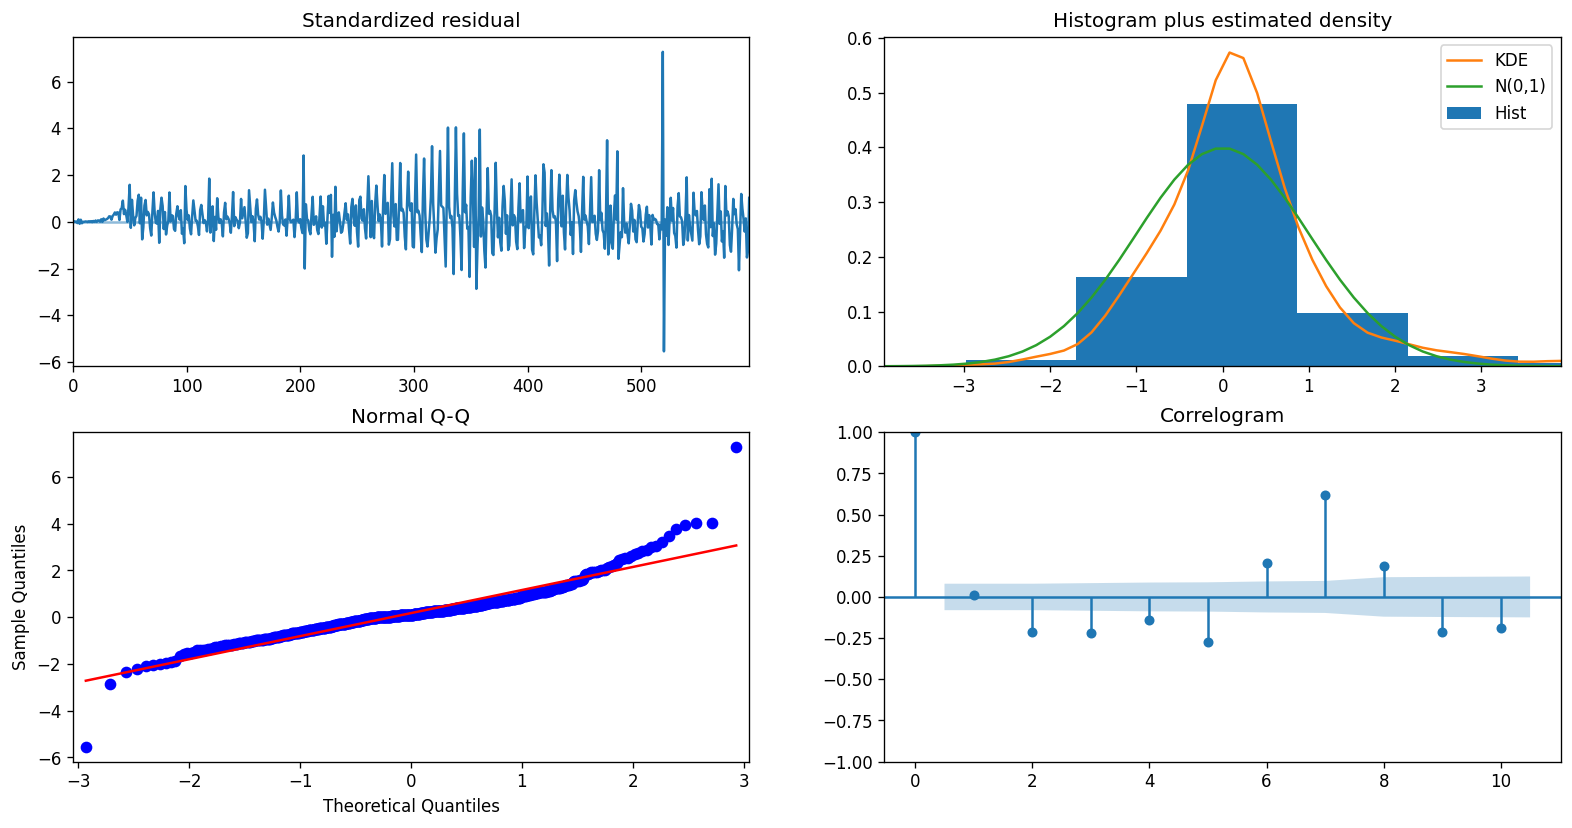

In [262]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [308]:
pred = results.get_forecast(steps=50)
pred.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,4.812759e+06,1884.812050,4.809064e+06,4.816453e+06
1,4.819782e+06,3998.557381,4.811945e+06,4.827619e+06
2,4.827186e+06,6368.181417,4.814705e+06,4.839668e+06
3,4.835037e+06,8889.072810,4.817615e+06,4.852460e+06
4,4.843057e+06,11493.877617,4.820529e+06,4.865585e+06
5,4.851103e+06,14137.350655,4.823394e+06,4.878812e+06
6,4.859413e+06,16788.252499,4.826509e+06,4.892318e+06
7,4.868082e+06,19424.728310,4.830011e+06,4.906154e+06
8,4.876326e+06,22031.459846,4.833145e+06,4.919507e+06
9,4.884483e+06,24597.802452,4.836272e+06,4.932693e+06


In [309]:
forecast_ci

array([[4809064.43964751, 4816452.76711756],
       [4811944.8399253 , 4827618.8968406 ],
       [4814704.74019227, 4839667.55264149],
       [4817615.03797714, 4852459.56310336],
       [4820529.48148233, 4865584.65382794],
       [4823394.17842043, 4878811.5746598 ],
       [4826508.78993957, 4892317.53046146],
       [4830010.69995027, 4906154.23574447],
       [4833145.34297736, 4919507.07862589],
       [4836271.73936082, 4932693.35317215],
       [4839593.56800017, 4945888.33924463],
       [4843378.17296367, 4959340.77657493],
       [4847179.65388437, 4972762.51770622],
       [4850880.98439589, 4985983.7877086 ],
       [4854846.01095525, 4999332.38787166],
       [4859176.58434396, 5012886.05079991],
       [4863623.01832701, 5026379.62043852],
       [4868065.49672709, 5039684.07739602],
       [4872760.57964018, 5053051.35104147],
       [4877817.23970726, 5066589.1113303 ],
       [4882462.32856876, 5079525.32036657],
       [4887043.02946934, 5092210.00567283],
       [48

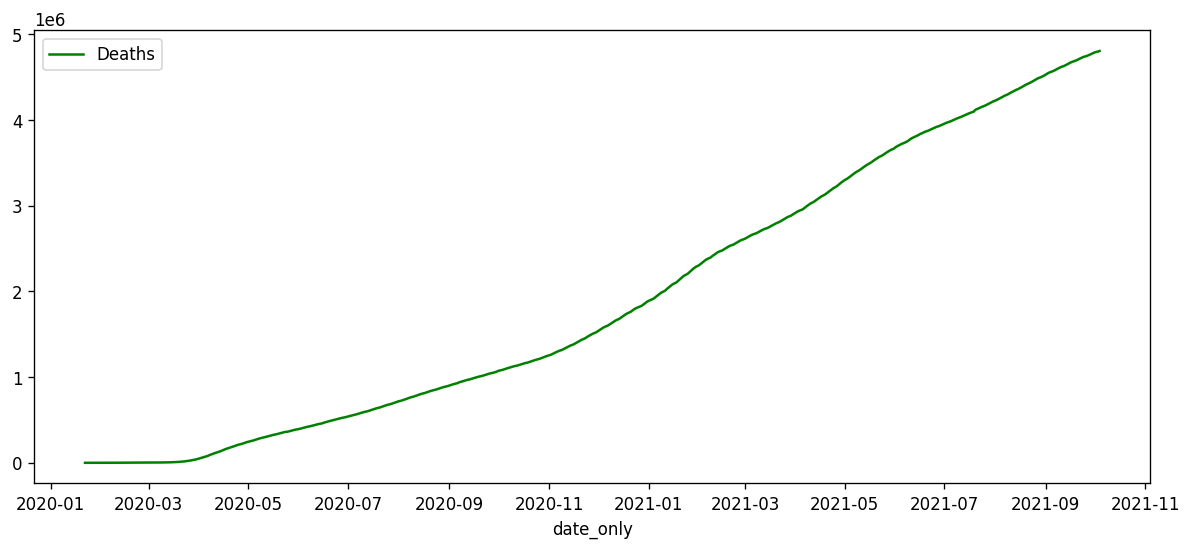

In [304]:
#Forecasting 3 years steps ahead
forecast_values = results.get_forecast(steps = 50)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = death.plot(x='date_only', y='Deaths', figsize = (12, 5), legend = True, color='g')

# #Plot the forecasted values 
# forecast_values.predicted_mean.plot(ax=ax, label='Forecasts', figsize = (12, 5), grid=True)

# df_forecast_ci = pd.DataFrame(forecast_ci)
# #Plot the confidence intervals
# ax.fill_between(df_forecast_ci.index,
#                 df_forecast_ci.iloc[: , 0],
#                 df_forecast_ci.iloc[: , 1], color='#D3D3D3', alpha = .5)

plt.show()

## Weather 

https://medium.com/analytics-vidhya/how-to-import-weather-data-into-python-scripts-7e9ff54f6aca

Weather API Documentation: https://www.visualcrossing.com/resources/documentation/weather-api/timeline-weather-api/


Full documentation: https://www.visualcrossing.com/resources/

In [85]:
weather = "https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/weatherdata/history?aggregateHours=24&combinationMethod=aggregate&startDateTime=2021-02-01T00%3A00%3A00&endDateTime=2021-09-20T00%3A00%3A00&maxStations=-1&maxDistance=-1&contentType=json&unitGroup=us&locationMode=array&key=KE4EMTWYEYYSBYEASSNUXKLDF&dataElements=default&locations=Tampa"

In [86]:
json = requests.get(weather).json()

In [87]:
df = pd.json_normalize(json)

In [90]:
df

,errorCode,executionTime,sessionId,message
0,999,-1,,You have exceeded the maximum number of daily ...


In [27]:
BASE_URL = "https://api.openweathermap.org/data/2.5/weather?"

In [28]:
CITY = "Tampa"
# Your API key
API_KEY = "bcd0c913b8e474a8dd2219c44d735b3e"

# updating the URL
URL = BASE_URL + "q=" + CITY + "&appid=" + API_KEY

In [29]:
json = requests.get(URL).json()

In [30]:
df = pd.json_normalize(json)
df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1632058505,-14400,4174757,Tampa,200,-82.4584,27.9475,...,1017,89,0,0,75,1,6046,US,1632050222,1632094208


Get historical data for added location

http://history.openweathermap.org/data/3.0/history/
result?id={location_id}&start={start_date}&end={end_date}&appid={API key}

In [41]:
URL = "http://history.openweathermap.org/data/3.0/history/Tampa?appid=bcd0c913b8e474a8dd2219c44d735b3e"

In [42]:
json = requests.get(URL).json()

In [43]:
df = pd.json_normalize(json)
df

,cod,message
0,401,Invalid API key. Please see http://openweather...


# Traffic API

data : https://data.lacity.org/Public-Safety/Traffic-Collision-Data-from-2010-to-Present/d5tf-ez2w


ref : https://medium.com/@bhaveshpatelaus/monitoring-real-time-traffic-incidents-using-tom-tom-apis-using-python-in-databricks-and-power-bi-ecbb714366ef

TOMTOM API service 
API_key = 'N1EjK0abAclxyhRH00Naesx4kOoeZb2w'


- Traffic Incidents
- Traffic Flow

In [91]:
apiKey = 'N1EjK0abAclxyhRH00Naesx4kOoeZb2w'


In [96]:
tomtom = "https://api.tomtom.com/traffic/services/5/incidentDetails?bbox=4.8854592519716675%2C52.36934334773164%2C4.897883244144765%2C52.37496348620152&fields=%7Bincidents%7Btype%2Cgeometry%7Btype%2Ccoordinates%7D%2Cproperties%7Bid%2CiconCategory%2CmagnitudeOfDelay%2Cevents%7Bdescription%2Ccode%7D%2CstartTime%2CendTime%2Cfrom%2Cto%2Clength%2Cdelay%2CroadNumbers%2CtimeValidity%2Caci%7BprobabilityOfOccurrence%2CnumberOfReports%2ClastReportTime%7D%2Ctmc%7BcountryCode%2CtableNumber%2CtableVersion%2Cdirection%2Cpoints%7Blocation%2Coffset%7D%7D%7D%7D%7D&key="+apiKey

In [98]:
dict = requests.get(tomtom).json()

In [101]:
dict

{'incidents': [{'type': 'Feature',
   'properties': {'id': 'fe79a514a33b5df116d2fc5182fd3391',
    'iconCategory': 8,
    'magnitudeOfDelay': 4,
    'startTime': '2021-09-10T14:05:30Z',
    'endTime': None,
    'from': 'Hartenstraat / Gasthuismolensteeg',
    'to': 'Raadhuisstraat',
    'length': 120.672,
    'delay': 0,
    'roadNumbers': [],
    'timeValidity': 'present',
    'events': [{'code': 401, 'description': 'Closed'}],
    'aci': None,
    'tmc': None},
   'geometry': {'type': 'LineString',
    'coordinates': [[4.8873053083, 52.3722486223],
     [4.8874353955, 52.3733309378]]}},
  {'type': 'Feature',
   'properties': {'id': 'f39e5891795a07eedd29664d7a0d6b7e',
    'iconCategory': 8,
    'magnitudeOfDelay': 4,
    'startTime': '2021-09-08T03:51:00Z',
    'endTime': None,
    'from': 'Raadhuisstraat',
    'to': 'Gasthuismolensteeg',
    'length': 128.7189931633,
    'delay': 0,
    'roadNumbers': [],
    'timeValidity': 'present',
    'events': [{'code': 401, 'description': 'Clo

In [102]:
df = pd.json_normalize(dict['incidents'])
df

,type,properties.id,properties.iconCategory,properties.magnitudeOfDelay,properties.startTime,properties.endTime,properties.from,properties.to,properties.length,properties.delay,...,properties.events,properties.aci,properties.tmc,geometry.type,geometry.coordinates,properties.tmc.countryCode,properties.tmc.tableNumber,properties.tmc.tableVersion,properties.tmc.direction,properties.tmc.points
0,Feature,fe79a514a33b5df116d2fc5182fd3391,8,4,2021-09-10T14:05:30Z,None,Hartenstraat / Gasthuismolensteeg,Raadhuisstraat,120.672000,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8873053083, 52.3722486223], [4.8874353955,...",NaN,NaN,NaN,NaN,NaN
1,Feature,f39e5891795a07eedd29664d7a0d6b7e,8,4,2021-09-08T03:51:00Z,None,Raadhuisstraat,Gasthuismolensteeg,128.718993,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8885431478, 52.3733242342], [4.8885243723,...",NaN,NaN,NaN,NaN,NaN
2,Feature,82a1d46b1c66caf51d5e827f448ef429,8,4,2021-09-19T10:47:04Z,None,Oude Leliestraat,Raadhuisstraat,143.328390,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8890272865, 52.374578152], [4.8889910767, ...",NaN,NaN,NaN,NaN,NaN
3,Feature,d6416d4049c610e9fcb41e5da4b8753c,8,4,2021-09-19T18:52:30Z,2022-03-31T21:59:00Z,Gasthuismolensteeg / Paleisstraat,Raadhuisstraat,112.673074,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8887778411, 52.3721990347], [4.8888609896,...",NaN,NaN,NaN,NaN,NaN
4,Feature,15050ace2431ea1732a7151af0b0e2a7,8,4,2021-08-17T07:56:30Z,2022-03-31T21:59:00Z,Raadhuisstraat,Raadhuisstraat,12.565129,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8891332338, 52.3731887798], [4.8891667614,...",NaN,NaN,NaN,NaN,NaN
5,Feature,45f9ded6e59cd92e652e65841f863638,8,4,2021-08-08T22:00:00Z,2022-02-01T22:59:00Z,Nassaukade - s100 (De Clercqstraat/v100-CR3),Nieuwezijds Voorburgwal (Raadhuisstraat/v100-CR3),151.985547,0,...,"[{'code': 24, 'description': 'Bridge closed'},...",None,NaN,LineString,"[[4.8874353955, 52.3733309378], [4.8885029147,...",8,17,9.7,positive,"[{'location': 55330, 'offset': 0}, {'location'..."
6,Feature,5ac2a06513a1b4ed9760619577e3368b,8,4,2021-09-15T13:04:00Z,None,Spuistraat,Nieuwezijds Voorburgwal,39.222314,0,...,"[{'code': 401, 'description': 'Closed'}]",None,NaN,LineString,"[[4.8897166142, 52.3715780851], [4.8902865837,...",NaN,NaN,NaN,NaN,NaN


In [103]:
# Traffice flow

link = "https://api.tomtom.com/traffic/services/4/flowSegmentData/relative0/10/json?point=27.950575%2C-82.457176&key="+apiKey


In [104]:
json = requests.get(link).json()

In [105]:
json

{'flowSegmentData': {'frc': 'FRC4',
  'currentSpeed': 19,
  'freeFlowSpeed': 19,
  'currentTravelTime': 117,
  'freeFlowTravelTime': 117,
  'confidence': 1,
  'roadClosure': False,
  'coordinates': {'coordinate': [{'latitude': 27.953028848184605,
     'longitude': -82.4573761835828},
    {'latitude': 27.95285181828674, 'longitude': -82.45729839952133},
    {'latitude': 27.952702997445424, 'longitude': -82.45723402650496},
    {'latitude': 27.9526023766708, 'longitude': -82.45718977005622},
    {'latitude': 27.95246288458089, 'longitude': -82.45712807924885},
    {'latitude': 27.952280522834894, 'longitude': -82.4570489540829},
    {'latitude': 27.952111562144104, 'longitude': -82.45697251112595},
    {'latitude': 27.95191172617421, 'longitude': -82.45688265712393},
    {'latitude': 27.95158179980664, 'longitude': -82.45673379452359},
    {'latitude': 27.9515335250381, 'longitude': -82.45671233685144},
    {'latitude': 27.951481252028266, 'longitude': -82.4566868558658},
    {'latitude'

In [109]:
df = pd.json_normalize(json['flowSegmentData'])
df

,frc,currentSpeed,freeFlowSpeed,currentTravelTime,freeFlowTravelTime,confidence,roadClosure,@version,coordinates.coordinate
0,FRC4,19,19,117,117,1,False,traffic-service-flow 1.0.018,"[{'latitude': 27.953028848184605, 'longitude':..."
